#### UNSW-NB 15 Dataset ML Methods Comparison
This notebook would implement several modified (Explainable AI (XAI)) machine learning methods:

Decision Trees
We will use Multi-layer perceptron.
XGBoost

In [1]:
# data cleaning and plots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# sklearn: data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# sklearn: train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

# sklearn classifiers

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import datasets, ensemble, model_selection
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

In [2]:
# Load data
initial_data = pd.read_csv('UNSW_NB15_training.csv')

In [3]:
# Look at the first 5 rows
initial_data.head(n=5)

dur  spkts  dpkts  sbytes  dbytes         rate  sttl  dttl  \
0  0.000011      2      0     496       0   90909.0902   254     0   
1  0.000008      2      0    1762       0  125000.0003   254     0   
2  0.000005      2      0    1068       0  200000.0051   254     0   
3  0.000006      2      0     900       0  166666.6608   254     0   
4  0.000010      2      0    2126       0  100000.0025   254     0   

         sload  dload  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0  180363632.0    0.0  ...                 1               2             0   
1  881000000.0    0.0  ...                 1               2             0   
2  854400000.0    0.0  ...                 1               3             0   
3  600000000.0    0.0  ...                 1               3             0   
4  850400000.0    0.0  ...                 1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2                0   
1           0                 0           1           2                0   
2           0                 0           1           3                0   
3           0                 0           2           3                0   
4           0                 0           2           3                0   

   attack_cat  label  
0      Normal      0  
1      Normal      0  
2      Normal      0  
3      Normal      0  
4      Normal      0  

[5 rows x 41 columns]

In [4]:
# information of the data: 583 data points, 10 features' columns and 1 target column
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   spkts              82332 non-null  int64  
 2   dpkts              82332 non-null  int64  
 3   sbytes             82332 non-null  int64  
 4   dbytes             82332 non-null  int64  
 5   rate               82332 non-null  float64
 6   sttl               82332 non-null  int64  
 7   dttl               82332 non-null  int64  
 8   sload              82332 non-null  float64
 9   dload              82332 non-null  float64
 10  sloss              82332 non-null  int64  
 11  dloss              82332 non-null  int64  
 12  sinpkt             82332 non-null  float64
 13  dinpkt             82332 non-null  float64
 14  sjit               82332 non-null  float64
 15  djit               82332 non-null  float64
 16  swin               823

## Check missing values

In [5]:
# check if there are Null values
initial_data.isnull().sum()

dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64

In [6]:
# Discard the rows with missing values
data_to_use = initial_data.dropna()

# Shape of the data: we could see that the number of rows remains the same as no null values were reported
data_to_use.shape

(82332, 41)

## Checking imbalanced issue on y
First, we get the X and y1 and y2 .

In [7]:
X = data_to_use.drop(axis=1, columns=['attack_cat']) # X is a dataframe
X = X.drop(axis=1, columns=['label'])


y1 = data_to_use['attack_cat'].values # y is an array
y2 = data_to_use['label'].values

In [8]:
# Calculate Y2 ratio
def data_ratio(y2):
    '''
    Calculate Y2's ratio
    '''
    unique, count = np.unique(y2, return_counts=True)
    ratio = round(count[0]/count[1], 1)
    return f'{ratio}:1 ({count[0]}/{count[1]})'

The class ratio for the original data: 1.2:1 (677/583)


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


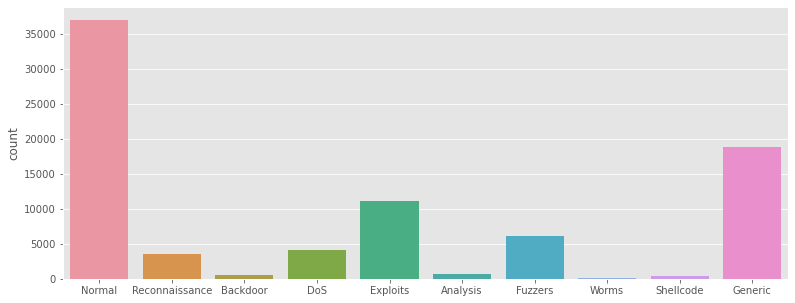

The class ratio for the original data: 0.8:1 (37000/45332)


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


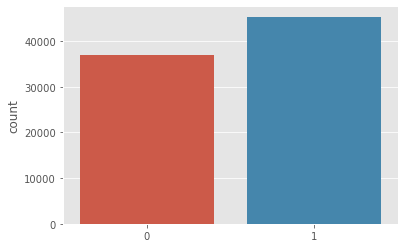

In [9]:
print('The class ratio for the original data:', data_ratio(y1))
plt.figure(figsize=(13,5))
sns.countplot(y1,label="Sum")
plt.show()

print('The class ratio for the original data:', data_ratio(y2))
sns.countplot(y2,label="Sum")
plt.show()

We could see that the dataset is not perfectly balanced. There are some sampling techniques to deal with this issue. Here, we ignore this issue because we are aimed to implement several ML models to compare their performance.

## Split training and testing data
It is important to split X and y as training set and testing set. Here, we will split the original data as 70% training set and 30% testing set. But the partition action from this dataset was pre configured as a training set and testing set, namely, UNSW_NB15_training-set.csv and UNSW_NB15_testing-set.csv respectively.

In [10]:
# Load data
test_data = pd.read_csv('UNSW_NB15_testing.csv')
X_test = test_data.drop(axis=1, columns=['attack_cat']) # X_test is a dataframe
X_test = X_test.drop(axis=1, columns=['label'])


y1_test = test_data['attack_cat'].values # y is an array
y2_test = test_data['label'].values

In [11]:
X_train = X
y1_train = y1
y2_train = y2

## Transform training and testing data
Transformation on X_train, X_test
The reason of performing transformation after splitting the original data is that we will fit those parameters on training set.
We need to perform OneHotEncoder on Gender column because it is categorical, and perform StandardScaler on other numerical columns.
First, we find out which columns are categorical and which are numerical.

In [12]:
# determine categorical and numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

In [13]:
numerical_cols

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

In [14]:
categorical_cols

Index([], dtype='object')

In [15]:
# define the transformation methods for the columns
t = [('ohe', OneHotEncoder(drop='first'), categorical_cols),
    ('scale', StandardScaler(), numerical_cols)]

col_trans = ColumnTransformer(transformers=t)

# fit the transformation on training data
col_trans.fit(X_train)

ColumnTransformer(transformers=[('ohe', OneHotEncoder(drop='first'),
                                 Index([], dtype='object')),
                                ('scale', StandardScaler(),
                                 Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object'))])

In [16]:
X_train_transform = col_trans.transform(X_train)

In [17]:
X_test_transform = col_trans.transform(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


In [18]:
# look at the transformed training data
X_train_transform.shape

(82332, 39)

In [19]:
X_test_transform.shape

(175341, 39)

## Transformation on y_train and y_test
LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1. Note that the distinct values/labels in y target are 1 ( no liver disease) and 2 (liver disease). In our case, we will transform the label 1 and 2 as 0 and 1, respectively. New label 0 refers to no disease and 1 refers to liver disease. Although it should be much easier to achieve this by subtracting 1 from the y array, we provide the LabelEncoder transformation which is a standard way of dealing with targeted values. Again, similar to the transformation on X, applying fit method to y_train and then apply transform method to both y_train and y_test.

In [20]:
# Note that the distinct values/labels in `y2` target are 1 and 2. 
pd.unique(y1)

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [21]:
pd.unique(y2)

array([0, 1], dtype=int64)

In [22]:
# Define a LabelEncoder() transformation method and fit on y1_train
target_trans = LabelEncoder()
target_trans.fit(y1_train)

LabelEncoder()

In [23]:
# apply transformation method on y1_train and y1_test
y1_train_transform = target_trans.transform(y1_train)
y1_test_transform = target_trans.transform(y1_test)

In [24]:
# view the transformed y1_train
y1_train_transform

array([6, 6, 6, ..., 6, 6, 6])

In [25]:
# Define a LabelEncoder() transformation method and fit on y2_train
target_trans = LabelEncoder()
target_trans.fit(y2_train)
y2_train_transform = target_trans.transform(y2_train)
y2_test_transform = target_trans.transform(y2_test)

In [26]:
# view the transformed y2_train
y2_train_transform

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Steps of Training Model and Testing Model Performance with Testing Data
Step 1: Train a XAI ML model and validate it via 5-fold cross-validation (CV). The CV results will show how good the model has been trained by using the training data given a set of hyperparameters in the ML model. The metrics of evaluating a model include accuracy, precision, recall, F1 score, AUC value of ROC.
Step 2: Evaluate the model by using the testing data. It will show how good the model could be used to make predictions for unseen data.

## 1) Decision Tree Classifier

In [27]:
# model and fit
DTclf = tree.DecisionTreeClassifier()
DTclf.fit(X_train_transform, y2_train_transform)

DecisionTreeClassifier()

In [28]:
feature_names = np.array(numerical_cols)
feature_names

array(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt',
       'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt',
       'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'], dtype=object)

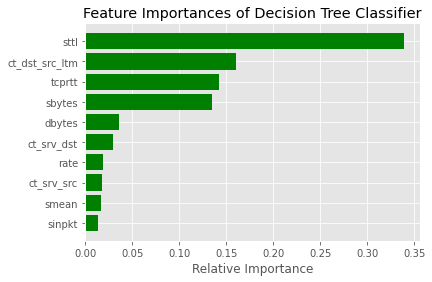

In [29]:
#feature importance
importances = DTclf.feature_importances_
indices = np.argsort(importances)
features = np.array(numerical_cols)
plt.title('Feature Importances of Decision Tree Classifier')
count = 10 # top # importance
plt.barh(range(count), importances[indices][len(indices)-count:], color='g', align='center')
plt.yticks(range(count), [features[i] for i in indices[len(indices)-count:]])
plt.xlabel('Relative Importance')
plt.show()

In [30]:
DTclf.feature_importances_

array([4.84634729e-03, 2.20388518e-03, 6.77625296e-04, 1.35365448e-01,
       3.55318542e-02, 1.90376388e-02, 3.38918968e-01, 0.00000000e+00,
       6.71831746e-03, 6.13021508e-03, 1.82758475e-03, 5.81205257e-04,
       1.35032080e-02, 4.06952693e-03, 2.34415898e-03, 2.92975519e-03,
       8.83697966e-05, 4.18737423e-03, 4.26017601e-03, 0.00000000e+00,
       1.42296100e-01, 6.38951361e-03, 4.61881955e-03, 1.68117108e-02,
       4.38231239e-03, 2.55720678e-03, 3.84835144e-03, 1.79613072e-02,
       1.66790418e-04, 8.66760060e-03, 6.44143505e-03, 6.14536397e-03,
       1.60397071e-01, 2.33872447e-05, 0.00000000e+00, 1.09500881e-03,
       5.40665655e-03, 2.95697063e-02, 0.00000000e+00])

In [31]:
# Create Decision Tree classifer object
DTclf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
DTclf = DTclf.fit(X_train_transform, y2_train_transform)

#Predict the response for test dataset
y_pred = DTclf.predict(X_test_transform)

In [32]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test_transform, y_pred))

report=metrics.classification_report(y2_test_transform,y_pred)

DTclf_name=['Decision Tree Classifer','RegLog']

print('Reporting for %s:'%DTclf_name)

print(report)

Accuracy: 0.8511072709748433
Reporting for ['Decision Tree Classifer', 'RegLog']:
              precision    recall  f1-score   support

           0       0.69      0.98      0.81     56000
           1       0.99      0.79      0.88    119341

    accuracy                           0.85    175341
   macro avg       0.84      0.88      0.84    175341
weighted avg       0.89      0.85      0.86    175341



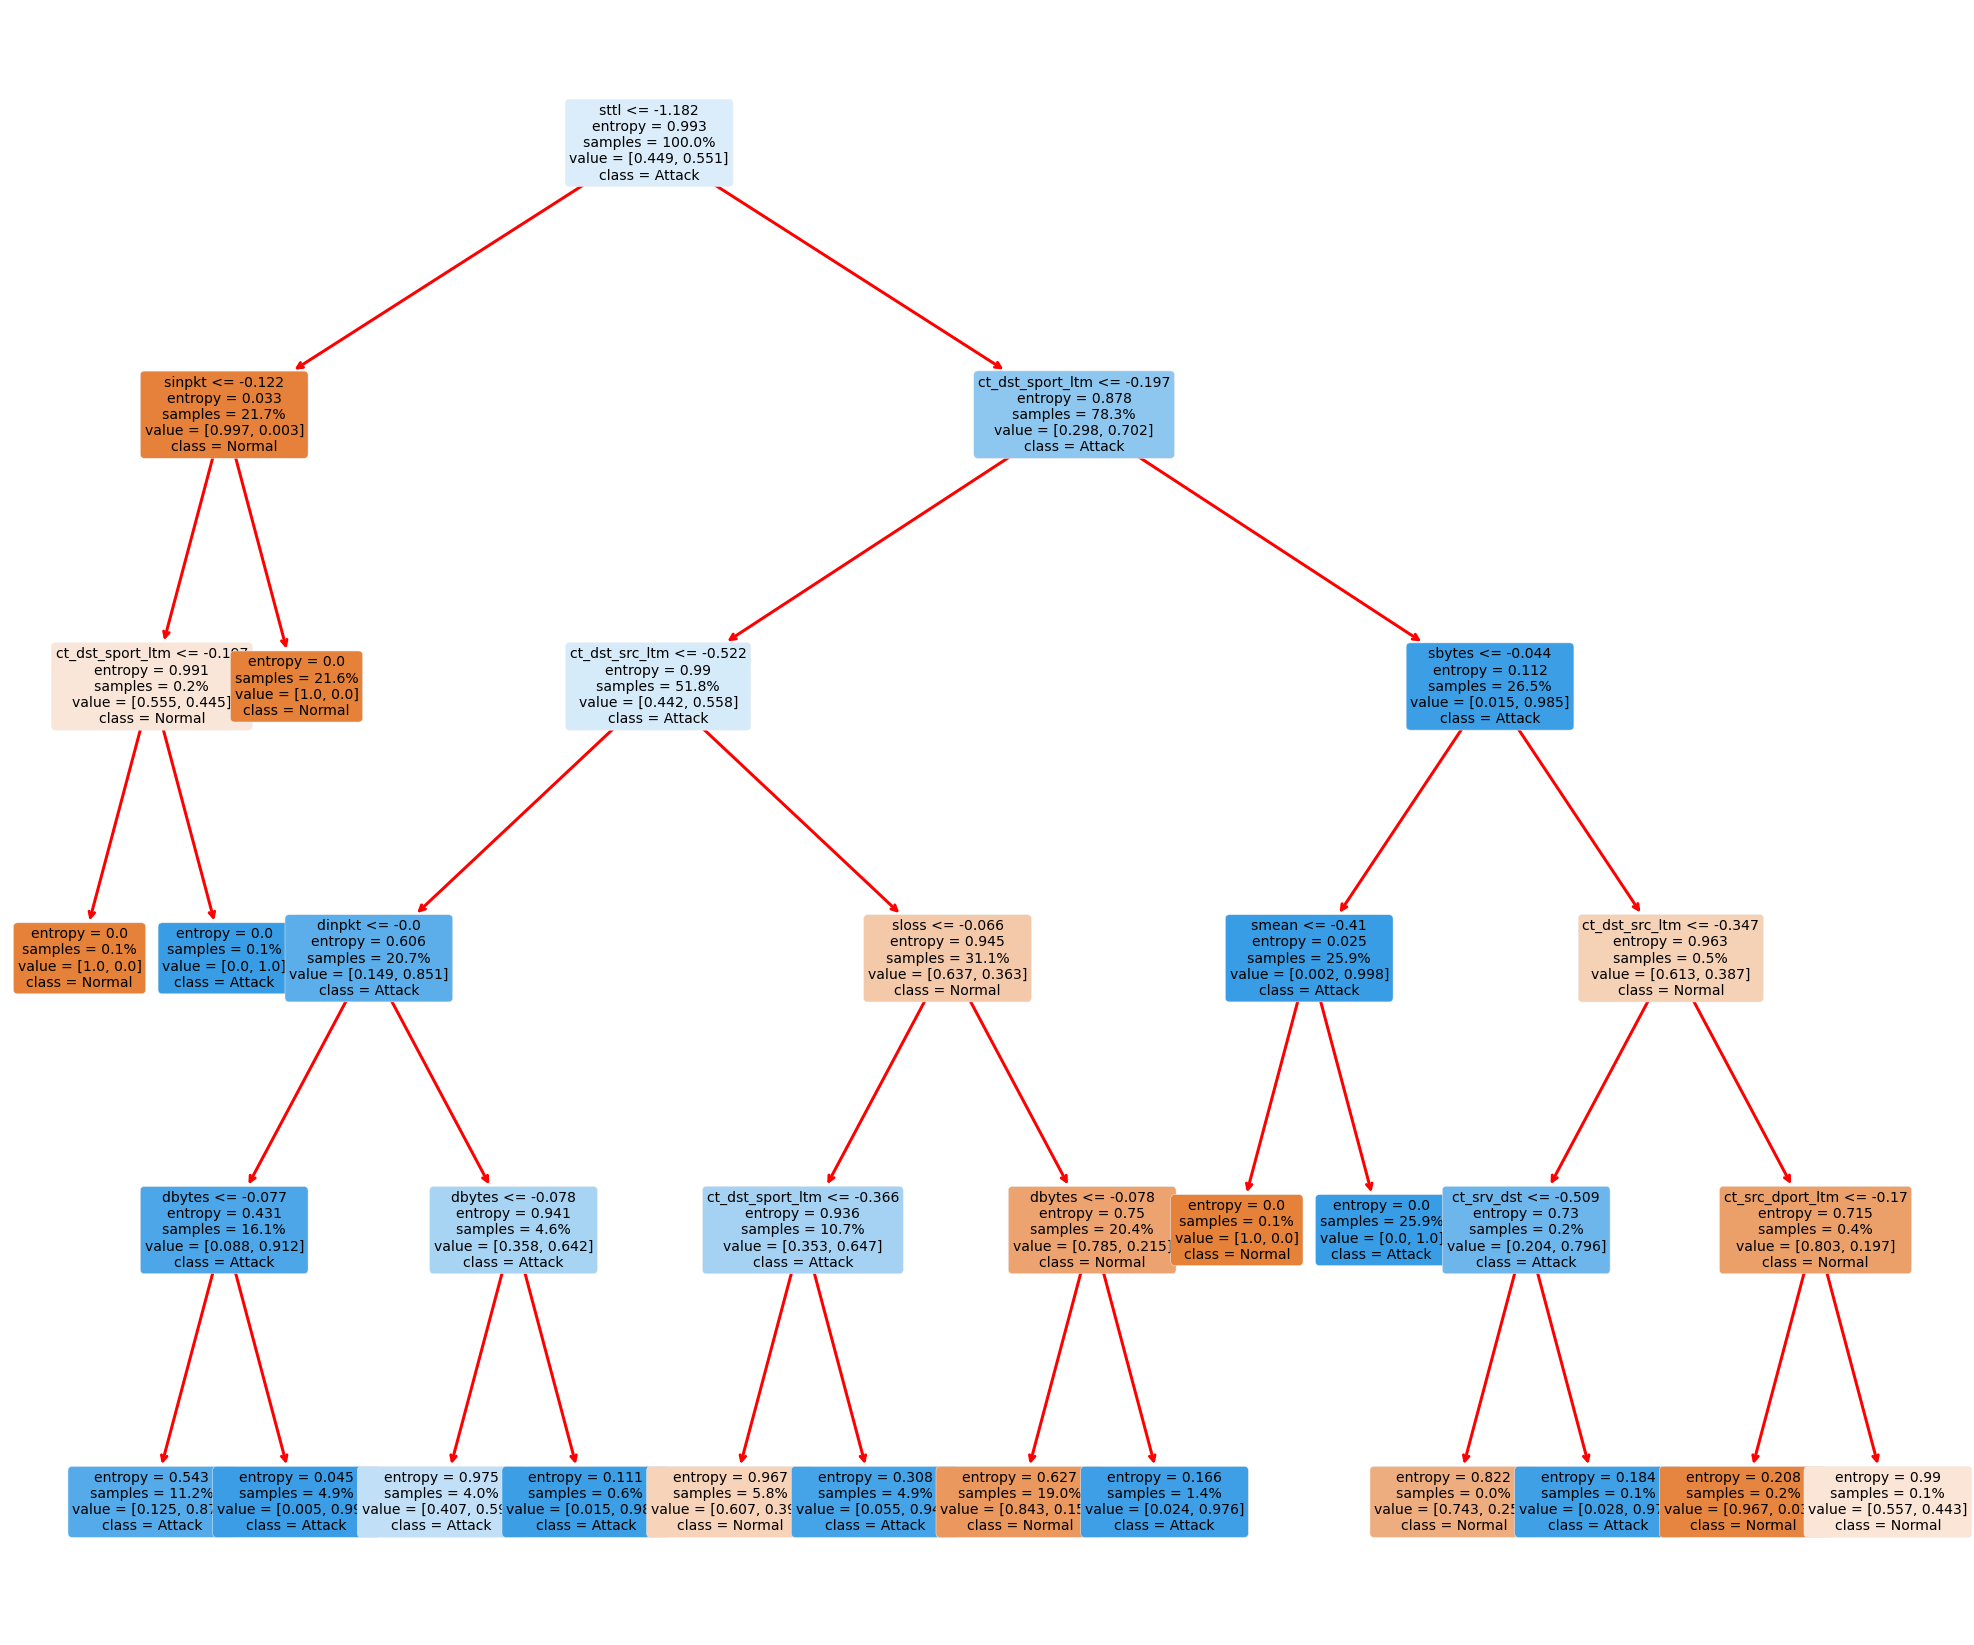

In [33]:
fig = plt.figure(figsize=(35, 30))
DTtree = tree.plot_tree(DTclf, feature_names = np.array(numerical_cols), class_names = ['Normal', 'Attack'], fontsize=14, proportion=True, filled=True, rounded=True)
for o in DTtree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

fig.savefig('Decision Tree Classifier Visualization Part 1.png')

In [35]:
!pip install eli5

In [36]:
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(DTclf, random_state=1).fit(X_test_transform, y2_test_transform)
eli5.show_weights(perm, feature_names = np.array(numerical_cols))

## Visualizing the first three levels of the decision tree, max_depth=3, 5, 8

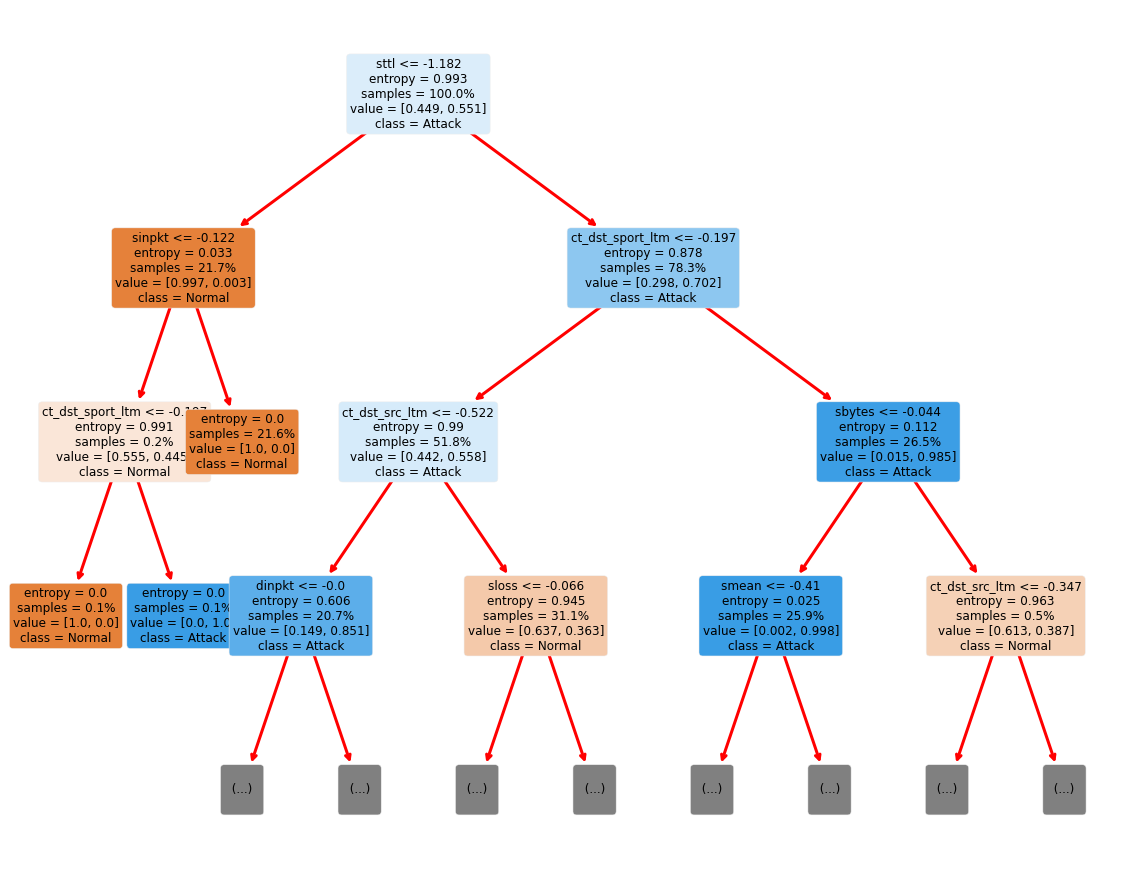

In [37]:
# visualization of DT Classfier
fig = plt.figure(figsize=(20, 16))
DTtree = tree.plot_tree(DTclf, feature_names = features, class_names = ['Normal', 'Attack'], fontsize=12, proportion=True, filled=True, rounded=True, max_depth=3) 
for o in DTtree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

fig.savefig('Decision Tree Classifier (Depth = 3 Nodes) Visualization.png')

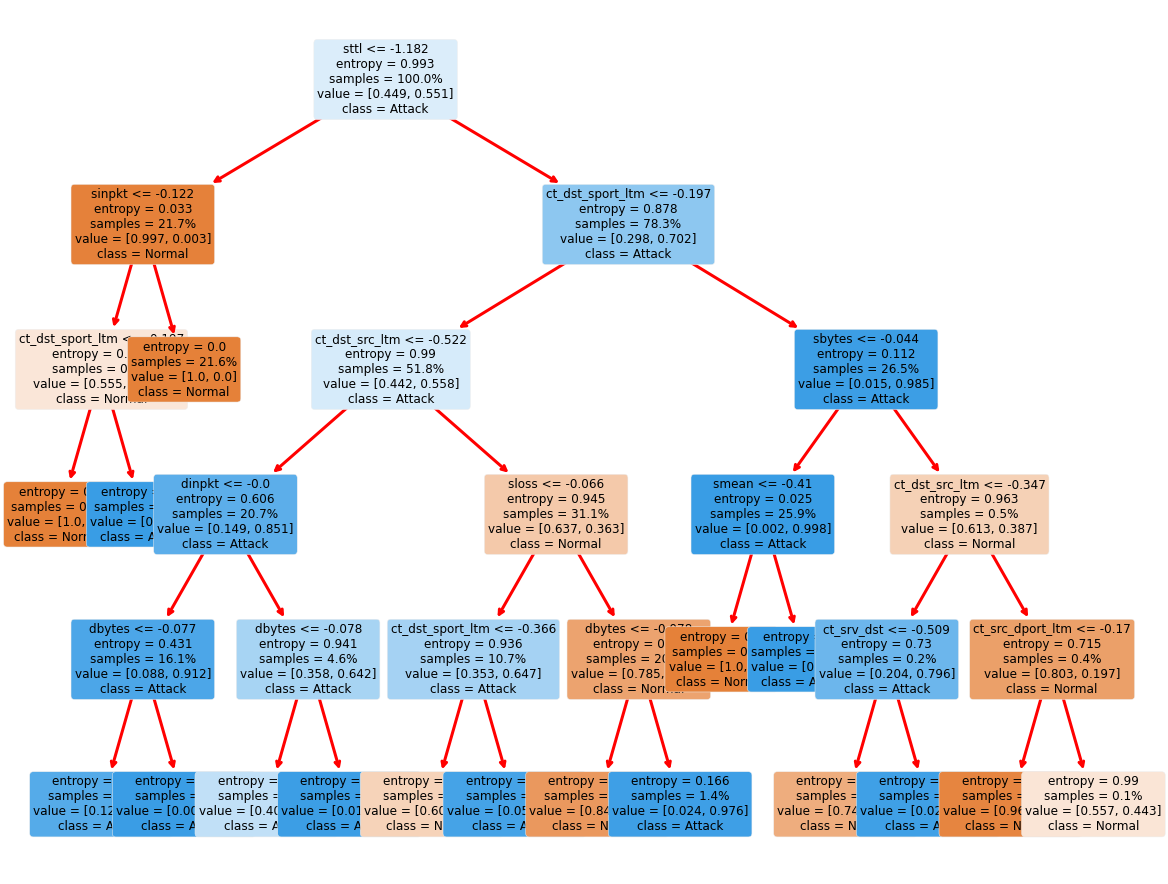

In [38]:
# visualization of DT Classfier
fig = plt.figure(figsize=(20, 16))
DTtree = tree.plot_tree(DTclf, feature_names = features, class_names = ['Normal', 'Attack'], fontsize=12, proportion=True, filled=True, rounded=True, max_depth=5) 
for o in DTtree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

fig.savefig('Decision Tree Classifier (Depth = 5 Nodes) Visualization.png')

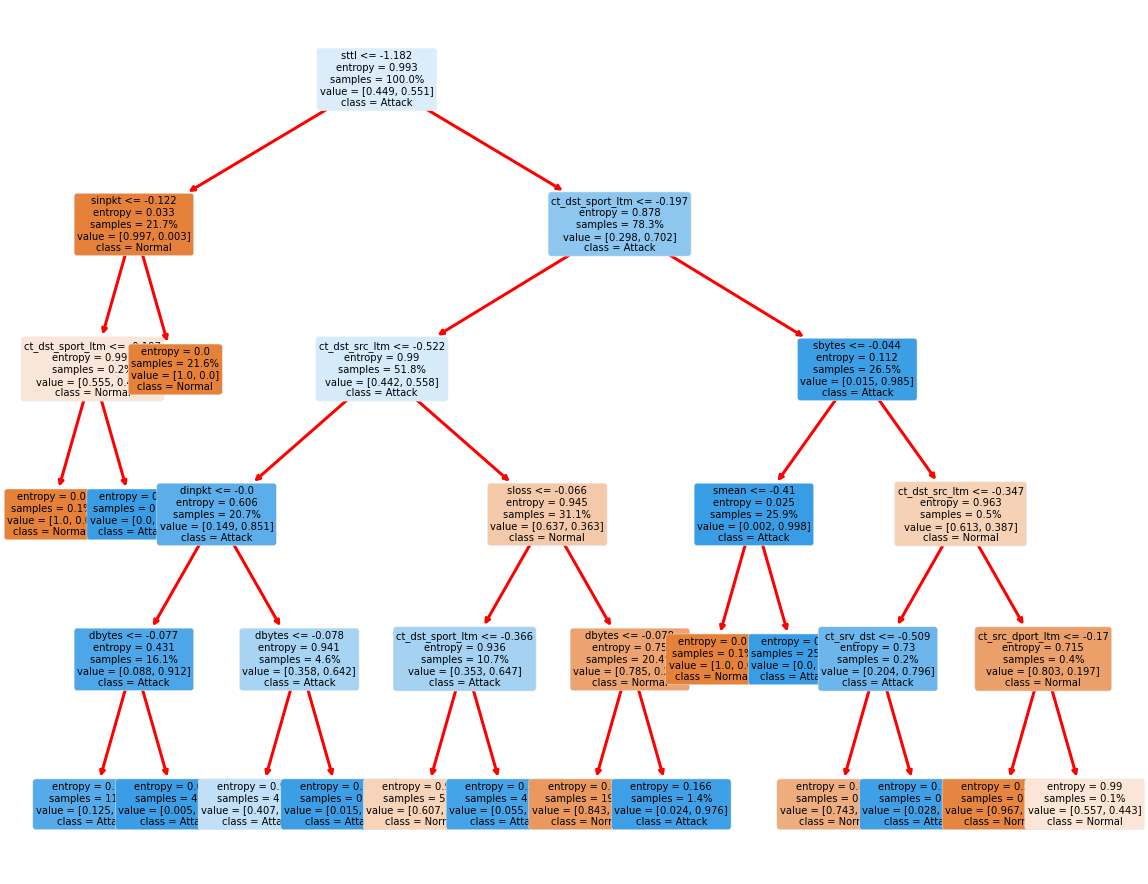

In [39]:
# visualization of DT Classfier
fig = plt.figure(figsize=(20, 16))
DTtree = tree.plot_tree(DTclf, feature_names = features, class_names = ['Normal', 'Attack'], fontsize=10, proportion=True, filled=True, rounded=True, max_depth=8) 
for o in DTtree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

fig.savefig('Decision Tree Classifier (Depth = 8 Nodes) Visualization.png')

## Model Performance On Testing Set:

In [40]:
# ===== Step 1: cross-validation ========
# define  Stratified 5-fold cross-validator, it provides train/validate indices to split data in train/validate sets.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

DTclf = tree.DecisionTreeClassifier()

# define metrics for evaluating
scoring = ['accuracy', 'precision_micro', 'recall_micro', 'f1_micro', 'roc_auc_ovr']  

# perform the 5-fold CV and get the metrics results
cv_results = cross_validate(estimator=DTclf,
                            X=X_train_transform,
                            y=y2_train_transform,
                            scoring=scoring,
                            cv=cv,
                            return_train_score=False) # prevent to show the train scores on cv splits.

In [41]:
cv_results

{'fit_time': array([2.12734795, 2.14918947, 2.0833919 , 2.26298571, 2.05653644]),
 'score_time': array([0.05495334, 0.04889202, 0.06988645, 0.04883003, 0.04988074]),
 'test_accuracy': array([0.9655675 , 0.96666059, 0.96368274, 0.9657476 , 0.96623345]),
 'test_precision_micro': array([0.9655675 , 0.96666059, 0.96368274, 0.9657476 , 0.96623345]),
 'test_recall_micro': array([0.9655675 , 0.96666059, 0.96368274, 0.9657476 , 0.96623345]),
 'test_f1_micro': array([0.9655675 , 0.96666059, 0.96368274, 0.9657476 , 0.96623345]),
 'test_roc_auc_ovr': array([0.96509296, 0.96624105, 0.9629078 , 0.96550637, 0.96612012])}

The CV results include:

test_score: The score array for test scores on each cv split. Suffix _score in test_score changes to a specific metric like test_accuracy or test_f1 if there are multiple scoring metrics in the scoring parameter.

fit_time: The time for fitting the estimator on the train set for each cv split.

score_time: The time for scoring the estimator on the test set for each cv split.

accuracy score:

In [42]:
cv_results['test_accuracy'].mean()

0.9655783769210184

In [44]:
# ======== Step 2: Evaluate the model using testing data =======

# fit the Logistic Regression model
DTclf.fit(X=X_train_transform, y=y2_train_transform)

# predition on testing data
y_pred_class = DTclf.predict(X=X_test_transform)
y_pred_score = DTclf.predict_proba(X=X_test_transform)[:, 1]

# AUC of ROC
auc_ontest = roc_auc_score(y_true=y2_test_transform, y_score=y_pred_score)
# confusion matrix
cm_ontest = confusion_matrix(y_true=y2_test_transform, y_pred=y_pred_class)
# precision score
precision_ontest = precision_score(y_true=y2_test_transform, y_pred=y_pred_class)
# recall score
recall_ontest = recall_score(y_true=y2_test_transform, y_pred=y_pred_class)
# classifition report
cls_report_ontest = classification_report(y_true=y2_test_transform, y_pred=y_pred_class)

# print the above results
print('The model scores {:1.5f} ROC AUC on the test set.'.format(auc_ontest))
print('The precision score on the test set: {:1.5f}'.format(precision_ontest))
print('The recall score on the test set: {:1.5f}'.format(recall_ontest))
print('Confusion Matrix:\n', cm_ontest)
# Print classification report:
print('Classification Report:\n', cls_report_ontest)

The model scores 0.91026 ROC AUC on the test set.
The precision score on the test set: 0.97961
The recall score on the test set: 0.85856
Confusion Matrix:
 [[ 53867   2133]
 [ 16880 102461]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85     56000
           1       0.98      0.86      0.92    119341

    accuracy                           0.89    175341
   macro avg       0.87      0.91      0.88    175341
weighted avg       0.91      0.89      0.89    175341



We could choose F1 score as the evaluation metric in this case. F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

## Explainable AI (XAI) with a MLP (Multi-Layer Perceptron)

In [140]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(1)

In [141]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
import numpy as np
import matplotlib.pylab as pl

In [142]:
MLP = MLPClassifier(random_state=123, solver='adam', max_iter=8000)
MLP.fit(X_train_transform, y2_train_transform)

MLPClassifier(max_iter=8000, random_state=123)

## Explainable AI (XAI) with XGBoost

In [143]:
xg_train = xgboost.DMatrix(X_train_transform, label=y2_train_transform)
xg_test = xgboost.DMatrix(X_test_transform, label=y2_test_transform)

In [144]:
#train model
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y2_train_transform),
    "eval_metric": "logloss"
}
model = xgboost.train(params, xg_train, 5000, evals = [(xg_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.65463
[100]	test-logloss:0.32982
[200]	test-logloss:0.25530
[300]	test-logloss:0.23115
[400]	test-logloss:0.22582
[426]	test-logloss:0.22611


In [145]:
#Explain predictions: Here we use the Tree SHAP implementation integrated into XGBoost to explain the testing dataset

# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model)
shap_values_test = explainer.shap_values(X_test_transform)

In [146]:
X_test_transform_ = pd.DataFrame(X_test_transform)

In [147]:
#Visualize a single prediction

# print the JS visualization code to the notebook
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_test[5,:], X_test_transform_.loc[5,:])

In [148]:
y2_test[5]

0

In [149]:
shap.force_plot(explainer.expected_value, shap_values_test[:1000,:], X_test_transform_.iloc[:1000,:])

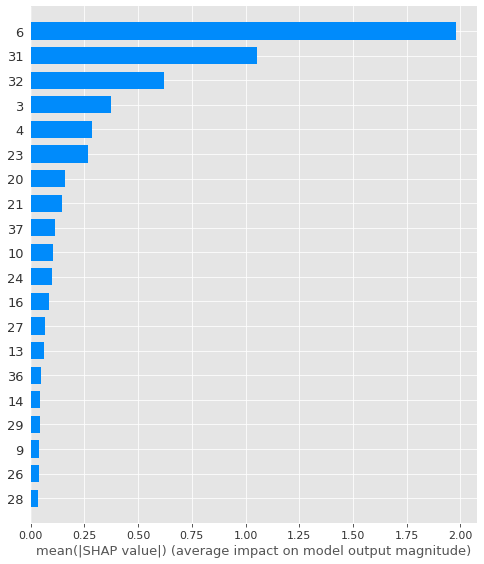

In [150]:
shap.summary_plot(shap_values_test, X_test_transform_, plot_type="bar")

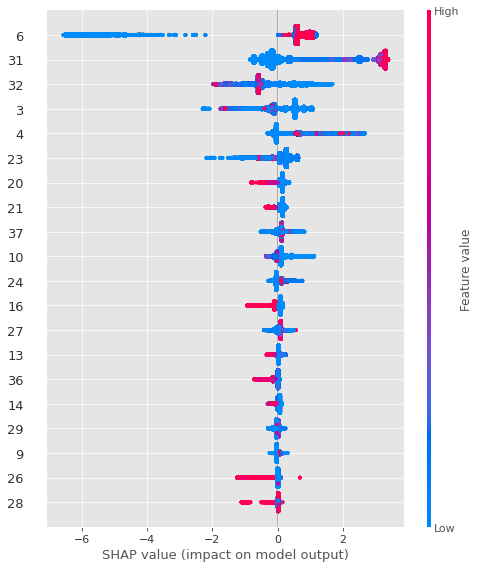

In [151]:
shap.summary_plot(shap_values_test, X_test_transform_)

## SHAP Dependence Plots

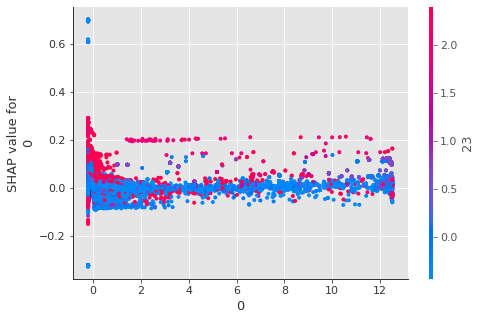

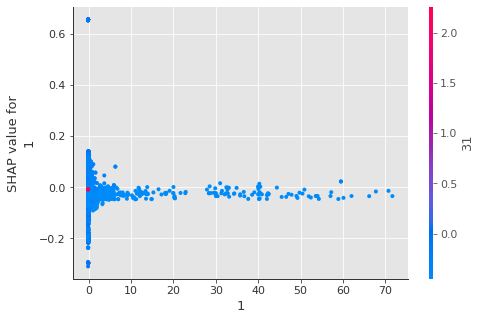

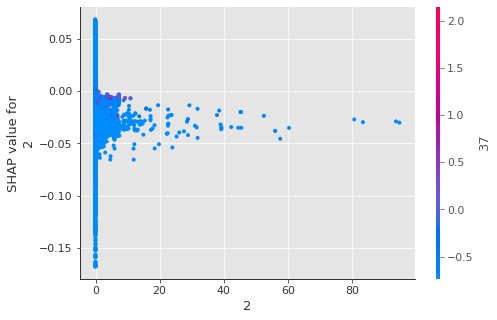

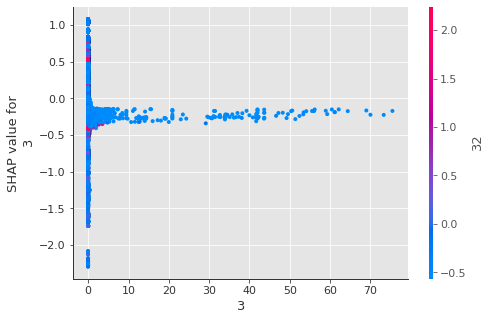

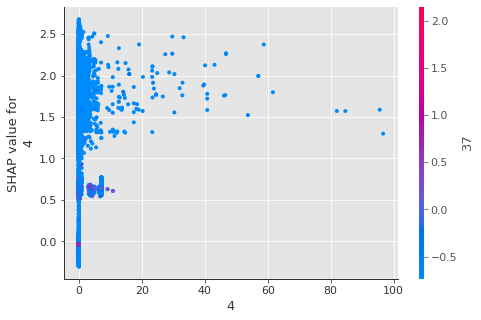

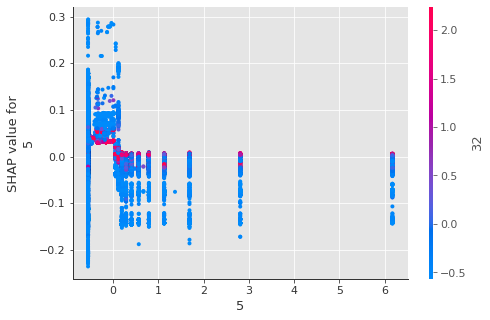

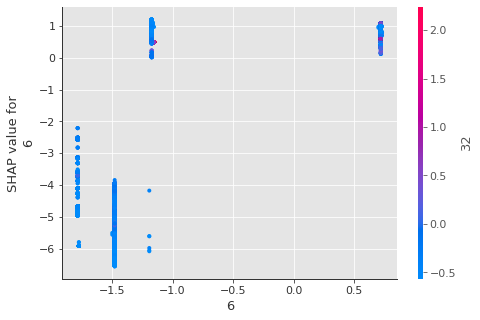

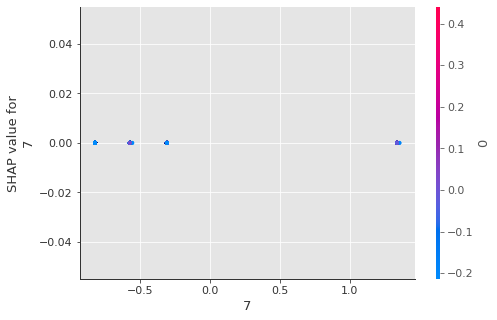

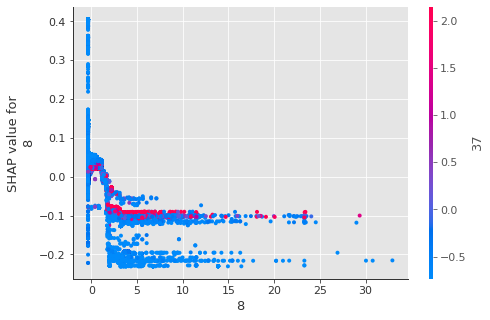

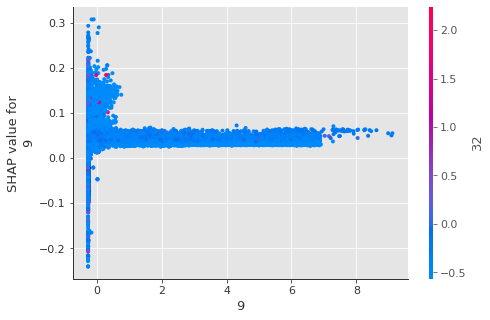

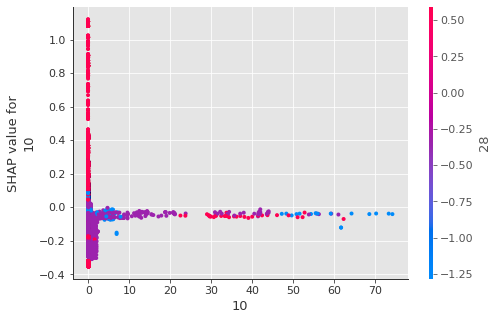

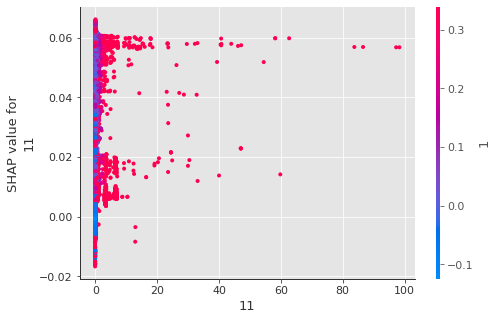

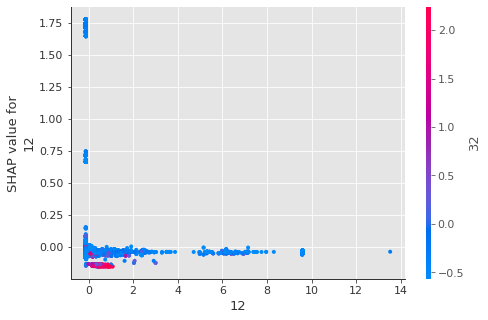

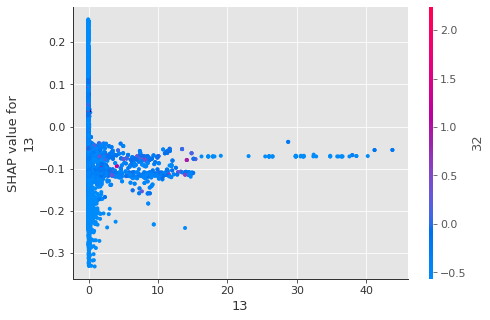

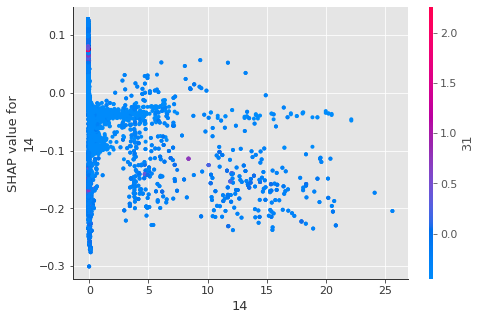

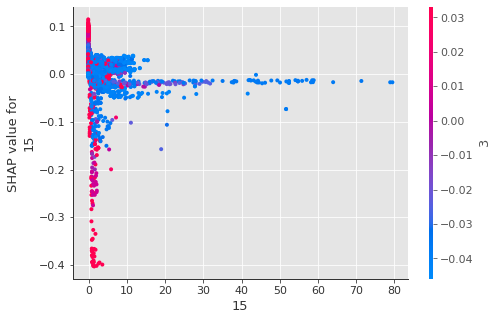

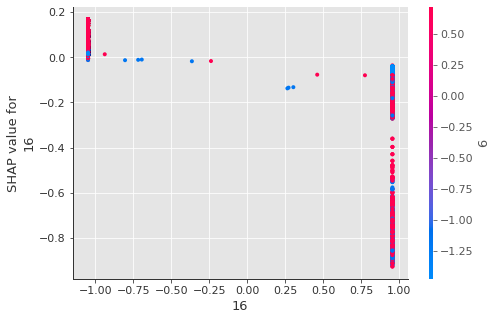

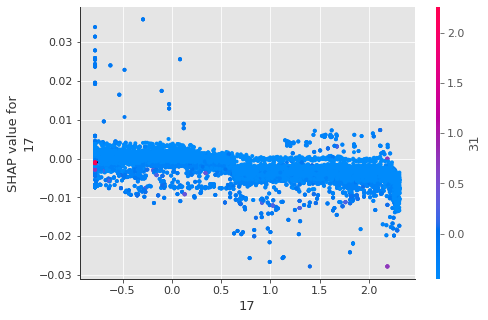

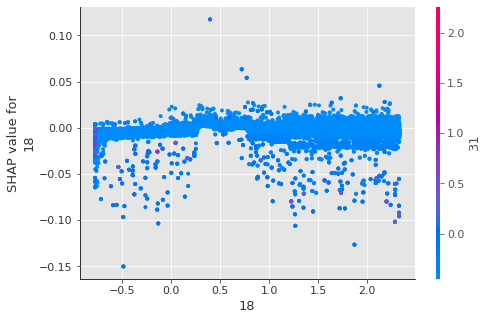

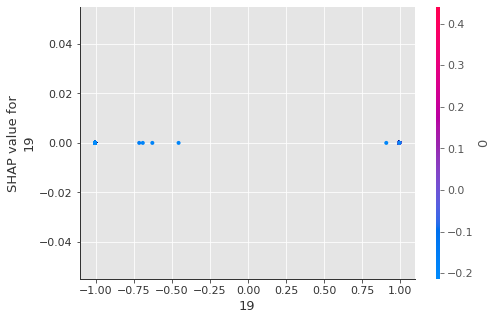

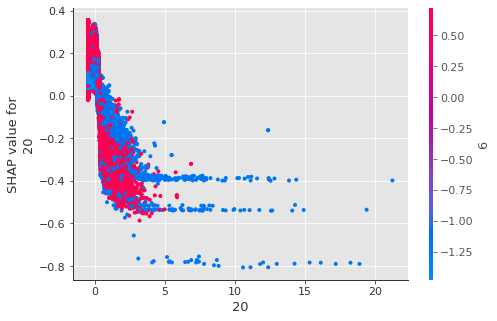

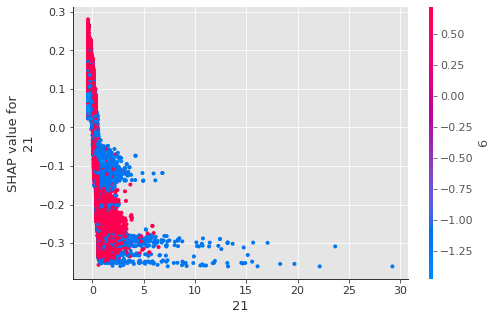

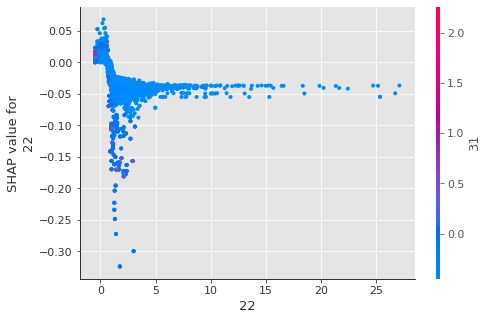

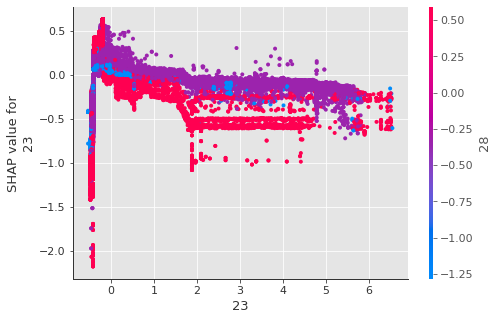

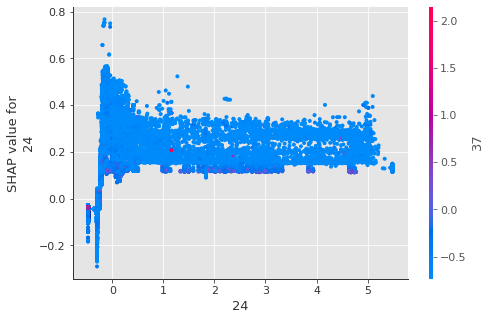

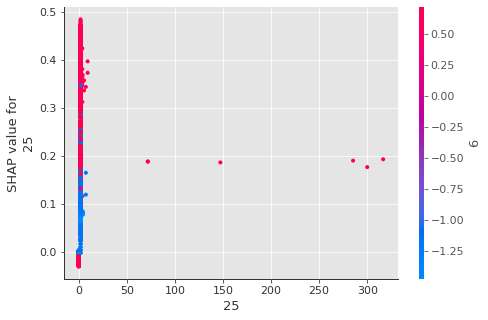

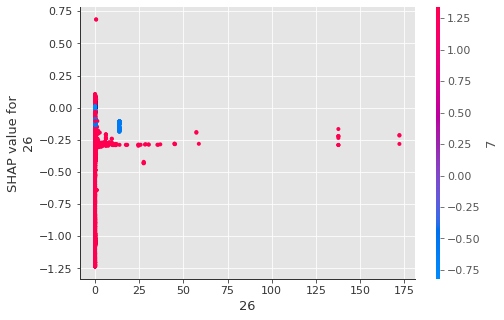

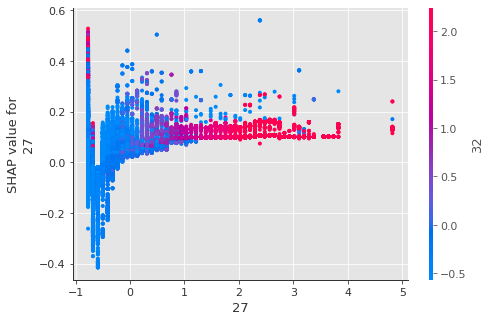

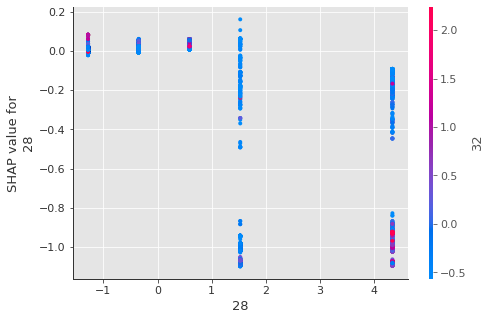

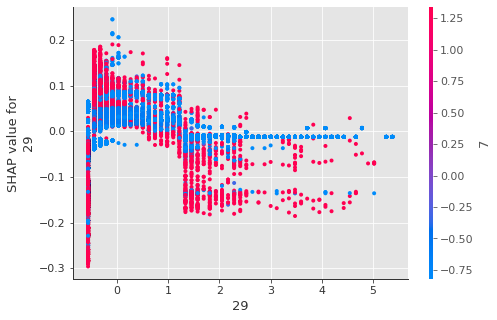

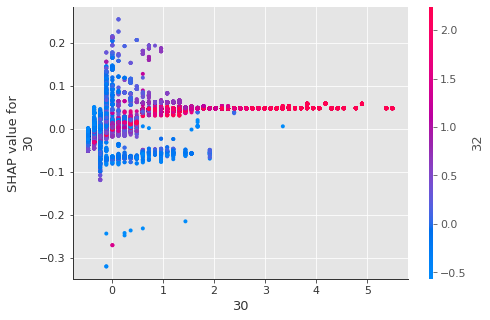

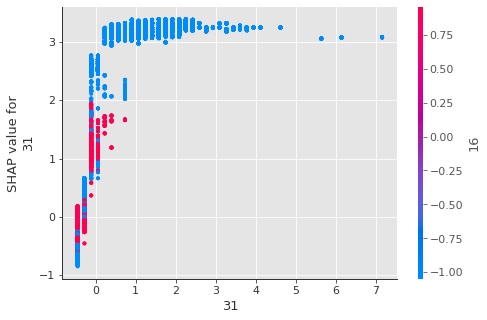

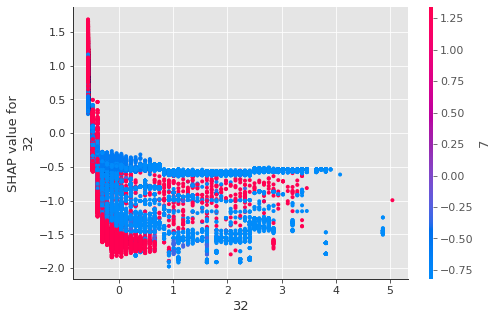

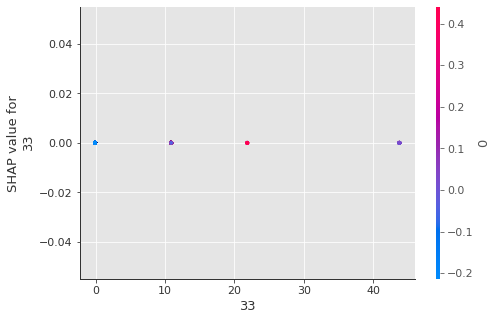

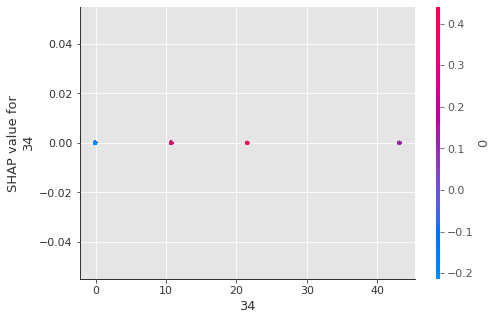

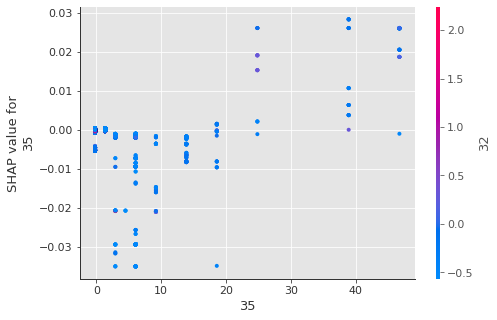

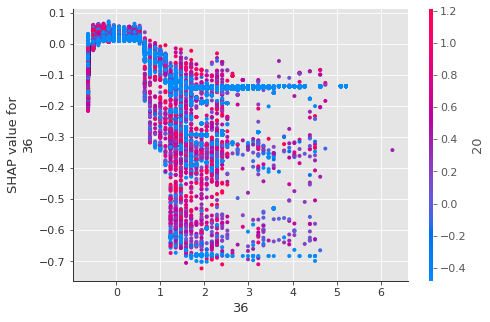

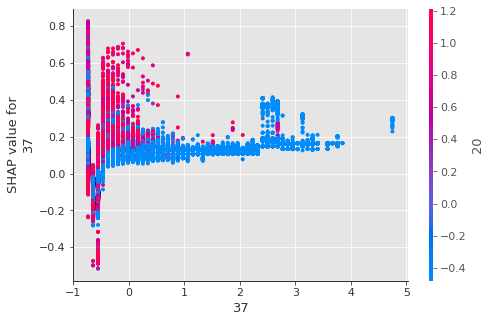

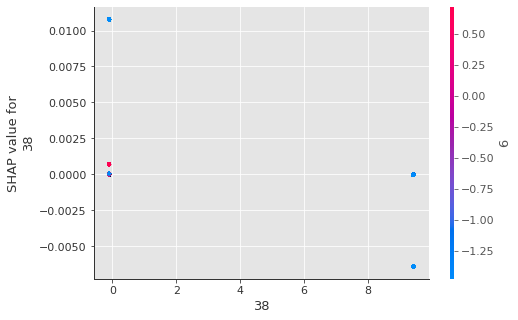

In [154]:
for name in X_test_transform_.columns:
    shap.dependence_plot(name, shap_values_test, X_test_transform_, display_features= X_test_transform_)

In [79]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(1)

In [80]:
import xgboost
gbtree = xgboost.XGBClassifier(n_estimators=300, max_depth=5)
gbtree.fit(X_train_transform, y2_train_transform)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[02:58:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
metrics.accuracy_score(y2_test_transform, gbtree.predict(X_test_transform))

0.8982953216874547

In [82]:
predict_fn = lambda x: gbtree.predict_proba(x).astype(float)

In [83]:
features = np.array(numerical_cols)
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_transform ,feature_names = features, class_names = ['Normal', 'Attack'], kernel_width=3)

In [84]:
np.random.seed(1)
i = 1653
exp = explainer.explain_instance(X_test_transform[i], predict_fn, num_features=5)
exp.show_in_notebook(show_all=False)

In [85]:
i = 10
exp = explainer.explain_instance(X_test_transform[i], predict_fn, num_features=5)
exp.show_in_notebook(show_all=False)